# Sample Size Experiment using Random Forest and Deep Networks

### Random Forest (RF) vs. Deep Networks (DN)

Random forest is inherently a non-parametric model, meaning that the algorithm requires no assumptions about the data distribution. With infinitely many trees and n -> $\infty$, RF will follow non-parametric behavior and will guarantee convergence.

Deep Networks with a fixed architecture are entirely parametric. As presented by [Vogelstein, et al. (2020)](https://www.biorxiv.org/content/10.1101/2020.04.29.068460v1), there is a clear bias variance tradeoff between DNs as the number of parameters change. This is evident by testing each model over a range of sample sizes. DNs (CNNs) perform particularly well on image datasets. 

### Experiment Discription

In [Vogelstein, et al. (2020)](https://www.biorxiv.org/content/10.1101/2020.04.29.068460v1), when trained on the CIFAR-10 dataset, both a simple DN and an overparametrized DN produced a lower classification error than RF for sample sizes greater than 2500. RF outperformed both DNs for sample sizes smaller than 2500. While this experiment only tests up to 10000 sample sizes, RF is theoretically guaranteed to produce a lower classification error at infinite samples due to its non-parametric nature.

The goal of this tutorial is to identify a joint distribution (X,Y) that demonstrates this relationship. RF should profuce a smaller generalization error as small sample sizes, a specific parametric DN should produce a smaller generalization error at medium sample sizes, and RF should once again produce a smaller generalization error at large sample sizes.

In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

### Load dependencies

Import required dependencies and model functions from sample_size_experiment.py

In [3]:
from sample_size_experiment import *

<IPython.core.display.Javascript object>

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from IPython.display import display
from scipy import stats

from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical

<IPython.core.display.Javascript object>

In [5]:
def sparse_parity(num_samples, p, p_star):
    X = np.random.uniform(-1, 1, [num_samples, p])
    y = np.sum(np.where(X[:, :p_star] >= 0, 1, 0), axis=1) % 2
    return X, y

<IPython.core.display.Javascript object>

In [27]:
from sklearn.model_selection import train_test_split
import time


def test_suite_timed(
    p,
    p_star,
    iterations,
    output_nodes,
    n_jobs,
    sample_sizes=[500, 1000, 2000, 3000, 5000, 7000, 10000, 15000, 20000, 30000],
    num_trees=100,
    max_depth=None,
    rf_verbose=1,
    epochs=10,
    batch_size=50,
    learning_rate=0.001,
    validation_split=0.3,
    dnn_verbose=1,
):

    rf_evolution = np.zeros((len(sample_sizes), iterations))
    #     dnn_evolution = np.zeros((len(sample_sizes), iterations))

    start_time = time.time()
    time_plot = np.zeros([iterations, 2])

    for iteration in range(iterations):
        print("iteration: ", iteration)

        for sample_size_index, max_sample_size in enumerate(sample_sizes):
            print("Max sample size: ", max_sample_size)

            X, y = sparse_parity(max_sample_size, p, p_star)
            print(X.shape)
            print(y.shape)
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.3, random_state=101
            )

            rf_model = random_forest_classifier_model(
                X_train=X_train,
                y_train=y_train,
                num_trees=num_trees,
                max_depth=max_depth,
                n_jobs=n_jobs,
                verbose=rf_verbose,
            )

            rf_predictions = rf_model.predict(X_test)
            rf_error = 1 - accuracy_score(y_test, rf_predictions)
            rf_evolution[sample_size_index][iteration] = rf_error
            print("\n\nRF ERROR: \n\n", rf_error)

        #             rf_evolution[sample_size_index][iteration] = rf_error

        #             if output_nodes == 1:
        #                 dnn_model = binary_deep_neural_network(
        #                     X_train=X_train,
        #                     y_train=y_train,
        #                     epochs=epochs,
        #                     batch_size=batch_size,
        #                     learning_rate=learning_rate,
        #                     validation_split=validation_split,
        #                     verbose=dnn_verbose,
        #                 )
        #             else:
        #                 y_train = to_categorical(y_train, num_classes=output_nodes)
        #                 y_test = to_categorical(y_test, num_classes=output_nodes)

        #                 dnn_model = multiclass_deep_neural_network(
        #                     X_train=X_train,
        #                     y_train=y_train,
        #                     epochs=epochs,
        #                     batch_size=batch_size,
        #                     learning_rate=learning_rate,
        #                     validation_split=validation_split,
        #                     output_nodes=output_nodes,
        #                     verbose=dnn_verbose,
        #                 )

        #             score = dnn_model.evaluate(
        #                 X_test,
        #                 y_test,
        #                 batch_size=None,
        #                 verbose=0,
        #                 sample_weight=None,
        #                 steps=None,
        #                 callbacks=None,
        #                 max_queue_size=10,
        #                 workers=1,
        #                 use_multiprocessing=False,
        #                 return_dict=False,
        #             )

        #             dnn_error = 1 - score[1]
        #             dnn_evolution[sample_size_index][iteration] = dnn_error

        current_time = time.time()
        time_plot[iteration, :] = [iteration, current_time - start_time]

    return rf_evolution, time_plot

<IPython.core.display.Javascript object>

In [ ]:
sample_sizes = [
    500,
    1000,
    2000,
    3000,
    5000,
    7000,
    10000,
    12500,
    15000,
    20000,
    25000,
    30000,
    35000,
]
# sample_sizes = [500, 1000, 2000]

start = time.time()
rf_e, rf_tp = test_suite_timed(
    p=14,
    p_star=3,
    n_jobs=-1,
    iterations=100,
    output_nodes=1,
    sample_sizes=sample_sizes,
    num_trees=500,
    rf_verbose=1,
    batch_size=16,
)
end = time.time()
print("\n\nTOTAL RUNTIME: \n\n", end - start)

In [29]:
%store rf_e
%store rf_tp

Stored 'rf_e' (ndarray)
Stored 'rf_tp' (ndarray)


<IPython.core.display.Javascript object>

In [30]:
print(rf_e)
print(rf_tp)

[[0.58666667 0.46666667 0.45333333 ... 0.52       0.49333333 0.47333333]
 [0.43       0.46       0.44       ... 0.45666667 0.41333333 0.48333333]
 [0.36666667 0.37166667 0.40666667 ... 0.35333333 0.39       0.355     ]
 ...
 [0.03893333 0.0456     0.1104     ... 0.08946667 0.0624     0.08333333]
 [0.04688889 0.01855556 0.08344444 ... 0.02866667 0.03411111 0.04111111]
 [0.00780952 0.01857143 0.03390476 ... 0.04047619 0.04133333 0.02428571]]
[[0.00000000e+00 2.93631063e+01]
 [1.00000000e+00 6.38970623e+01]
 [2.00000000e+00 1.01927253e+02]
 [3.00000000e+00 1.39960574e+02]
 [4.00000000e+00 1.79730628e+02]
 [5.00000000e+00 2.18741191e+02]
 [6.00000000e+00 2.57481003e+02]
 [7.00000000e+00 2.97234058e+02]
 [8.00000000e+00 3.36600060e+02]
 [9.00000000e+00 3.74598140e+02]
 [1.00000000e+01 4.13751214e+02]
 [1.10000000e+01 4.52243752e+02]
 [1.20000000e+01 4.92727770e+02]
 [1.30000000e+01 5.32116583e+02]
 [1.40000000e+01 5.71887068e+02]
 [1.50000000e+01 6.10747600e+02]
 [1.60000000e+01 6.50109115e

<IPython.core.display.Javascript object>

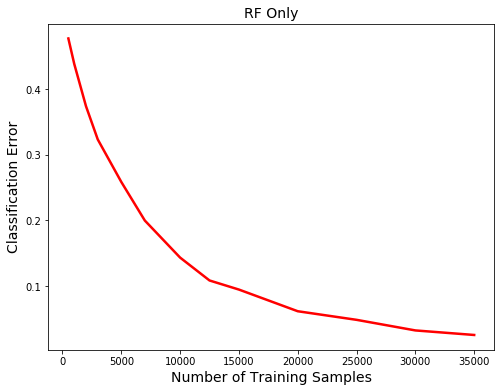

<IPython.core.display.Javascript object>

In [31]:
rf_evolution_mean = np.mean(rf_e, axis=1)

fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
ax.plot(sample_sizes, rf_evolution_mean, "r", linewidth=2.5)
plt.title("RF Only", fontsize=14)
plt.xlabel("Number of Training Samples", fontsize=14)
plt.ylabel("Classification Error", fontsize=14)

fig.savefig("sparse_parity_RF_only_100_iters.png")

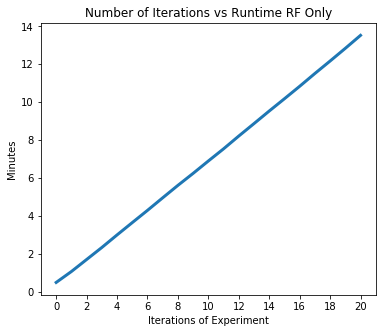

<IPython.core.display.Javascript object>

In [32]:
fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111)
ax.plot(rf_tp[:21, 0], rf_tp[:21, 1] / 60, linewidth=3)
plt.title("Number of Iterations vs Runtime RF Only")
plt.xlabel("Iterations of Experiment")
plt.ylabel("Minutes")
plt.xticks(list(range(0, 22, 2)))

fig.savefig("Time_plot_RF_only")

In [19]:
from sklearn.model_selection import train_test_split
import time


def test_suite_timed(
    p,
    p_star,
    iterations,
    output_nodes,
    hidden_nodes,
    n_jobs,
    sample_sizes=[500, 1000, 2000, 3000, 5000, 7000, 10000, 15000, 20000, 30000],
    num_trees=100,
    max_depth=None,
    rf_verbose=1,
    epochs=10,
    batch_size=50,
    learning_rate=0.001,
    validation_split=0.3,
    dnn_verbose=1,
):

    #     rf_evolution = np.zeros((len(sample_sizes), iterations))
    dnn_evolution = np.zeros((len(sample_sizes), iterations))

    start_time = time.time()
    time_plot = np.zeros([iterations, 2])

    for iteration in range(iterations):
        print("iteration: ", iteration)

        for sample_size_index, max_sample_size in enumerate(sample_sizes):
            print("Max sample size: ", max_sample_size)

            X, y = sparse_parity(max_sample_size, p, p_star)
            print(X.shape)
            print(y.shape)
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.3, random_state=101
            )

            #             rf_model = random_forest_classifier_model(
            #                 X_train=X_train,
            #                 y_train=y_train,
            #                 num_trees=num_trees,
            #                 max_depth=max_depth,
            #                 n_jobs=n_jobs,
            #                 verbose=rf_verbose,
            #             )

            #             rf_predictions = rf_model.predict(X_test)
            #             rf_error = 1 - accuracy_score(y_test, rf_predictions)
            #             rf_evolution[sample_size_index][iteration] = rf_error
            #             print("\n\nRF ERROR: \n\n", rf_error)

            #                     rf_evolution[sample_size_index][iteration] = rf_error

            if output_nodes == 1:
                dnn_model = binary_deep_neural_network(
                    X_train=X_train,
                    y_train=y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    learning_rate=learning_rate,
                    validation_split=validation_split,
                    hidden_nodes=hidden_nodes,
                    verbose=dnn_verbose,
                )
            else:
                y_train = to_categorical(y_train, num_classes=output_nodes)
                y_test = to_categorical(y_test, num_classes=output_nodes)

                dnn_model = multiclass_deep_neural_network(
                    X_train=X_train,
                    y_train=y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    learning_rate=learning_rate,
                    validation_split=validation_split,
                    output_nodes=output_nodes,
                    verbose=dnn_verbose,
                )

            score = dnn_model.evaluate(
                X_test,
                y_test,
                batch_size=None,
                verbose=0,
                sample_weight=None,
                steps=None,
                callbacks=None,
                max_queue_size=10,
                workers=1,
                use_multiprocessing=False,
                return_dict=False,
            )

            dnn_error = 1 - score[1]
            dnn_evolution[sample_size_index][iteration] = dnn_error

        current_time = time.time()
        time_plot[iteration, :] = [iteration, current_time - start_time]

    return dnn_evolution, time_plot

<IPython.core.display.Javascript object>

In [ ]:
sample_sizes = [
    500,
    1000,
    2000,
    3000,
    5000,
    7000,
    10000,
    12500,
    15000,
    20000,
    25000,
    30000,
    35000,
]
import time

# sample_sizes = [500, 1000, 2000]

start = time.time()
dnn_e_4hn_3bs, dnn_tp_4hn_3bs = test_suite_timed(
    p=14,
    p_star=3,
    n_jobs=-1,
    iterations=100,
    output_nodes=1,
    sample_sizes=sample_sizes,
    num_trees=500,
    hidden_nodes=4,
    rf_verbose=1,
    batch_size=3,
)
end = time.time()
print("\n\nTOTAL RUNTIME: \n\n", end - start)

In [21]:
# %store dnn_e_6hn_5bs
# %store dnn_tp_6hn_5bs

# %store dnn_e_5hn_5bs
# %store dnn_tp_5hn_5bs

# %store dnn_e_4hn_4bs
# %store dnn_tp_4hn_4bs

# %store dnn_e_4hn_2bs
# %store dnn_tp_4hn_2bs

%store dnn_e_4hn_3bs
%store dnn_tp_4hn_3bs

Stored 'dnn_e_4hn_3bs' (ndarray)
Stored 'dnn_tp_4hn_3bs' (ndarray)


<IPython.core.display.Javascript object>

In [6]:
%store -r dnn_e_4hn_3bs

<IPython.core.display.Javascript object>

In [33]:
sample_sizes = [
    500,
    1000,
    2000,
    3000,
    5000,
    7000,
    10000,
    12500,
    15000,
    20000,
    25000,
    30000,
    35000,
]

scaled_sample_sizes = [int(ss * 0.7) for ss in sample_sizes]

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Classification Error')

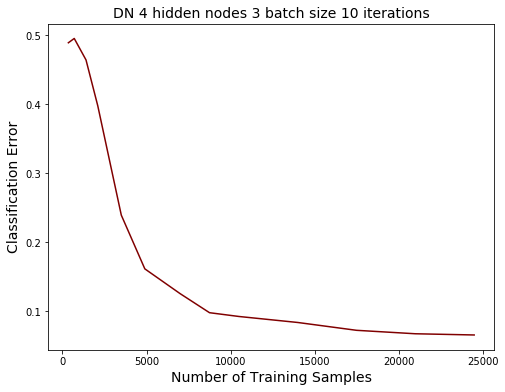

<IPython.core.display.Javascript object>

In [34]:
dnn_e_4hn_3bs_mean = np.mean(dnn_e_4hn_3bs, axis=1)

fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
ax.plot(scaled_sample_sizes, dnn_e_4hn_3bs_mean, linewidth=1.5, c="maroon")

# ax.plot(sample_sizes, rf_evolution_mean, linewidth=2.5, c="black", linestyle="dashed")

plt.title("DN 4 hidden nodes 3 batch size 10 iterations", fontsize=14)
plt.xlabel("Number of Training Samples", fontsize=14)
plt.ylabel("Classification Error", fontsize=14)
# plt.legend(
#     [
#         "4 Hidden Nodes",
#         "5 Hidden Nodes",
#         "6 Hidden Nodes",
#         "7 Hidden Nodes",
#         "Random Forest",
#     ],
#     prop={"size": 12},
# )

# fig.savefig("Final Figures/dnn_4hn_3bs_10iters.png")

Text(0, 0.5, 'Classification Error')

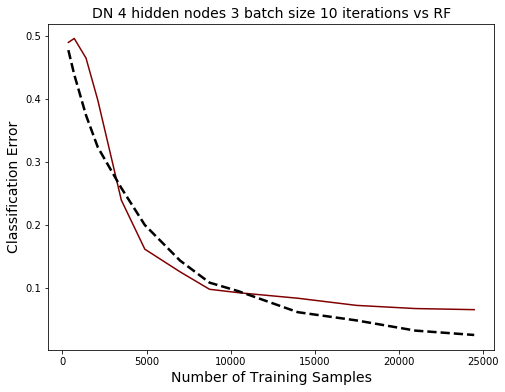

<IPython.core.display.Javascript object>

In [35]:
%store -r rf_e
rf_e_mean = np.mean(rf_e, axis=1)

fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
ax.plot(scaled_sample_sizes, dnn_e_4hn_3bs_mean, linewidth=1.5, c="maroon")

ax.plot(scaled_sample_sizes, rf_e_mean, linewidth=2.5, c="black", linestyle="dashed")

plt.title("DN 4 hidden nodes 3 batch size 10 iterations vs RF", fontsize=14)
plt.xlabel("Number of Training Samples", fontsize=14)
plt.ylabel("Classification Error", fontsize=14)
# plt.legend(
#     [
#         "4 Hidden Nodes",
#         "5 Hidden Nodes",
#         "6 Hidden Nodes",
#         "7 Hidden Nodes",
#         "Random Forest",
#     ],
#     prop={"size": 12},
# )

# fig.savefig("Final Figures/dnn_4hn_3bs_10iters_rf_overlay.png")

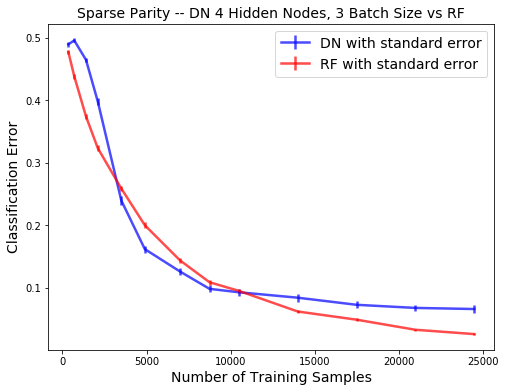

<IPython.core.display.Javascript object>

In [36]:
dnn_e_4hn_3bs_mean = np.mean(dnn_e_4hn_3bs, axis=1)

yerr_dn = stats.sem(dnn_e_4hn_3bs, axis=1)
yerr_rf = stats.sem(rf_e, axis=1)

rf_e_mean = np.mean(rf_e, axis=1)

fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
# ax.plot(sample_sizes, dnn_e_4hn_3bs_mean, linewidth=1.5, c="maroon")
# ax.plot(sample_sizes, rf_e_mean, linewidth=2.5, c="black", linestyle="dashed")
ax.errorbar(
    scaled_sample_sizes,
    dnn_e_4hn_3bs_mean,
    yerr=yerr_dn,
    linewidth=2.5,
    c="b",
    alpha=0.7,
)
ax.errorbar(
    scaled_sample_sizes, rf_e_mean, yerr=yerr_rf, linewidth=2.5, c="r", alpha=0.7
)

plt.title("Sparse Parity -- DN 4 Hidden Nodes, 3 Batch Size vs RF", fontsize=14)
plt.xlabel("Number of Training Samples", fontsize=14)
plt.ylabel("Classification Error", fontsize=14)
plt.legend(["DN with standard error", "RF with standard error"], prop={"size": 14})

# fig.savefig("Final Figures/dnn_4hn_3bs_10iters_rf_overlay_FINAL.png")

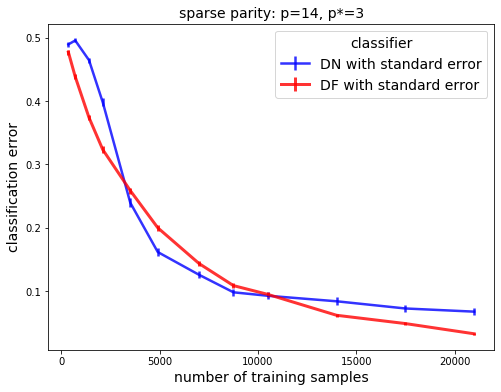

<IPython.core.display.Javascript object>

In [37]:
dnn_e_4hn_3bs_mean_30000 = np.mean(dnn_e_4hn_3bs[:-1, :], axis=1)
rf_e_mean = np.mean(rf_e[:-1, :], axis=1)

yerr_dn = stats.sem(dnn_e_4hn_3bs[:-1, :], axis=1)
yerr_rf = stats.sem(rf_e[:-1, :], axis=1)

fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
# ax.plot(sample_sizes, dnn_e_4hn_3bs_mean, linewidth=1.5, c="maroon")
# ax.plot(sample_sizes, rf_e_mean, linewidth=2.5, c="black", linestyle="dashed")
ax.errorbar(
    scaled_sample_sizes[:-1],
    dnn_e_4hn_3bs_mean_30000,
    yerr=yerr_dn,
    linewidth=2.5,
    c="b",
    alpha=0.8,
)
ax.errorbar(
    scaled_sample_sizes[:-1], rf_e_mean, yerr=yerr_rf, linewidth=3, c="r", alpha=0.8
)

plt.title("sparse parity: p=14, p*=3", fontsize=14)
plt.xlabel("number of training samples", fontsize=14)
plt.ylabel("classification error", fontsize=14)
legend = ax.legend(
    ["DN with standard error", "DF with standard error"],
    title="classifier",
    prop={"size": 14},
)
plt.setp(legend.get_title(), fontsize=14)

fig.savefig("Final Figures/dnn_4hn_3bs_10iters_rf_overlay_FINAL_30000_edits2.png")

In [ ]:
# def test_suite_batch(
#     X,
#     y,
#     iterations,
#     output_nodes,
#     batches,
#     nodes,
#     sample_sizes=[500, 1000, 2000, 3000, 5000, 7000, 10000, 12500, 15000, 20000, 30000, 35000],
#     epochs=10,
#     learning_rate=0.001,
#     validation_split=0.3,
#     dnn_verbose=1,
# ):

#     X = np.array(X, dtype=np.float32)
#     y = np.array(y, dtype=np.float32)

#     dnn_evolution = np.zeros((len(sample_sizes), iterations * len(batches)))

#     for index, batch in enumerate(batches):
#         print("BATCH: ", batch)
#         for iteration in range(iterations):
#             print("iteration: ", iteration)

#             for sample_size_index, max_sample_size in enumerate(sample_sizes):
#                 print("Max sample size: ", max_sample_size)

#                 X_scaled, y_scaled = random_sample(X, y, max_sample_size)
#                 X_train, X_test, y_train, y_test = train_test_split(
#                     X_scaled, y_scaled, test_size=0.3, random_state=101
#                 )

#                 if output_nodes == 1:
#                     dnn_model = binary_deep_neural_network_batch(
#                         X_train=X_train,
#                         y_train=y_train,
#                         hidden_nodes=nodes,
#                         epochs=epochs,
#                         batch_size=batch,
#                         learning_rate=learning_rate,
#                         validation_split=validation_split,
#                         verbose=dnn_verbose,
#                     )

#                 score = dnn_model.evaluate(
#                     X_test,
#                     y_test,
#                     batch_size=None,
#                     verbose=0,
#                     sample_weight=None,
#                     steps=None,
#                     callbacks=None,
#                     max_queue_size=10,
#                     workers=1,
#                     use_multiprocessing=False,
#                     return_dict=False,
#                 )

#                 dnn_error = 1 - score[1]
#                 dnn_evolution[sample_size_index][
#                     iteration + iterations * index
#                 ] = dnn_error

#     return dnn_evolution

In [1]:
# from joblib import Parallel, delayed

# sample_sizes = [500, 1000, 2000]

# start = time.time()
# Parallel(n_jobs=-1)(
#     delayed(
#         test_suite_timed(
#             p=14,
#             p_star=3,
#             iterations=3,
#             output_nodes=1,
#             sample_sizes=sample_sizes,
#             num_trees=500,
#             rf_verbose=1,
#             batch_size=16,
#         )
#     )
# )


# end = time.time()
# print("\n\nTOTAL RUNTIME: \n\n", end - start)